In [1]:
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
import numpy as np
import time

In [6]:
class Dataset:
    def __init__(self):
        pass
    def generate(self, x):
        """
        Simple quadratic function to generate numbers from single variable
        """
#         y = x**2 + 3
        y = 2*x + 3
        return y
    def linear_transform(self, x, w, b):
        """
        Perform a linear transformation on the input array x using weights/slope w and bias/intercept b.
        Args:
            x: Input array of independent data.
            w: Weight vector or slope vector.
            b: Bias value or intercept.
        Returns:
            Transformed matrix.
        """
        return x @ w + b

In [7]:
class LinearRegression:
    def __init__(self):
        self.w = 0
        self.b = 0
        self.alpha = 0.01
        self.iterations = 10000
    def computeCost(self, x, y, w, b):
        """
        Calculate cost or squared error on the data using: (1 / (2 * m))sum((y_hat - y)^2)
        """
        m = len(y)
        y_hat = x @ w + b
        squared_diff = (y_hat - y)**2
        cost = (1 / (2 * m)) * sum(squared_diff)
        return cost
    
    def computeGradient(self, x, y, w, b):
        """
        Calculate gradients  dw = (1/m)*sum((y^ - y)*x); and db = (1/m)*sum((y^ - y))
        """
        m = len(y)
        # derivative w.r.t w
        y_hat = x @ w + b
        dw = (1/m) * sum((y_hat - y) @ x)
        db = (1/m) * sum(y_hat - y)
        return dw, db
    
    def predict(self, x, w, b):
        """
        Predicts y given input x
        """
        y_pred = x @ w + b
        return np.ceil(y_pred)

In [8]:
# x = np.random.rand(10,2)

# y = [Dataset.linear_transform(i, (2,3), 5) for i in X]
# y = np.array(y)

# x.shape, y.shape, x, y

In [9]:
data = Dataset()

x = [i for i in range(10)]
y = [data.generate(i) for i in range(10)]
x = np.array(x)
y = np.array(y)

x = x.reshape(-1,1)

x.shape, y.shape

((10, 1), (10,))

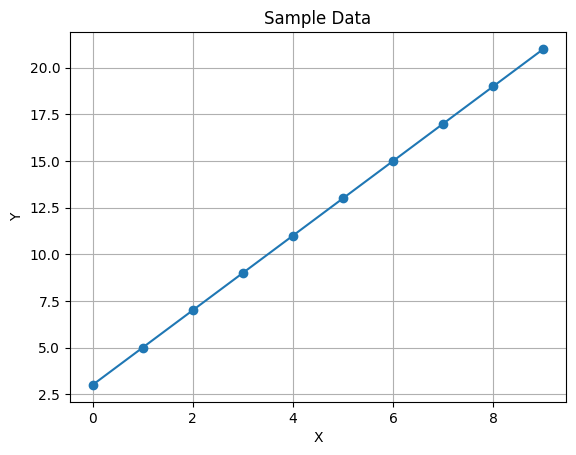

In [10]:
# Plotting Data
plt.plot(x, y, marker='o', linestyle='-')
plt.title('Sample Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)

In [11]:
model = LinearRegression()

w = np.zeros(x.shape[1])
b = 0
alpha = 0.01

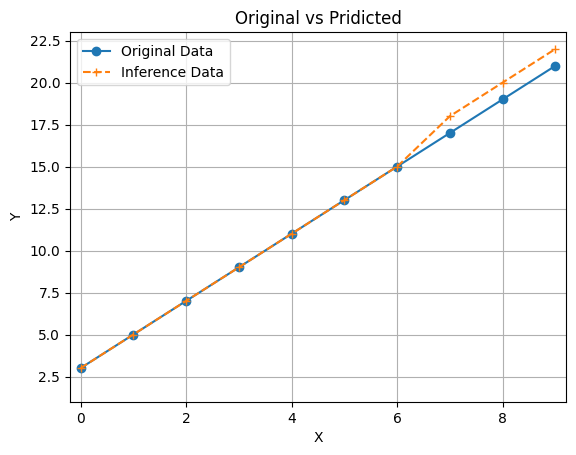

In [12]:
# DELETE
def update_plot(x, y, model, w, b):
    plt.xlim(min(x)-0.2, max(x)+0.2)
    plt.ylim(min(y)-2, max(y)+2)
    plt.plot(x, y, marker="o", label='Original Data')
    y_pred = model.predict(x, w, b)
    plt.plot(x, y_pred, marker="+", label='Inference Data', linestyle='--')
    plt.title('Original vs Pridicted')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(True)
    plt.legend()
    plt.show()
    time.sleep(0.1)  # Adjust the sleep time for the desired update rate
    clear_output(wait=True)
    
    

J = []
prev_cost = 0
for i in range(10000):
    if i%50 == 0:
        #Ploting
        update_plot(x, y, model, w, b)
    
    cost = model.computeCost(x, y, w, b)
    J.append(cost)
    dw, db = model.computeGradient(x, y, w, b)
    w = w - alpha * dw
    b = b - alpha * db
#     print(cost) if i%100==0 else None
    if abs(cost - prev_cost) < 1e-6:
        break
    prev_cost = cost
    
    
        

In [13]:
0%50

0

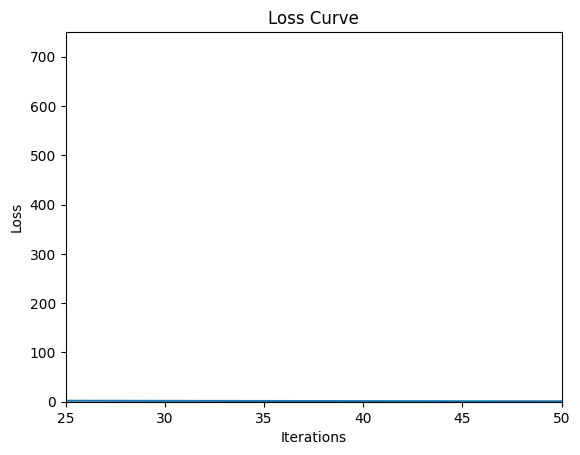

In [14]:
# Plot loss curve
plt.xlim(25, 50)
plt.ylim(0,750)
plt.plot(J, [i for i in range(len(J))])
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.show()

In [17]:
y_pred = model.predict(x, w, b)

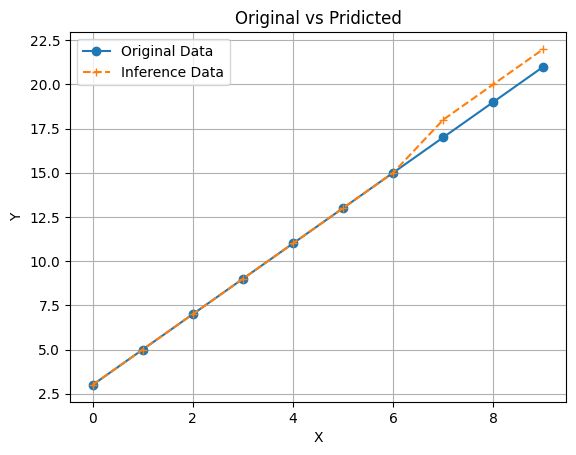

In [18]:
plt.plot(x, y, marker="o", label='Original Data')
plt.plot(x, y_pred, marker="+", label='Inference Data', linestyle='--')
plt.title('Original vs Pridicted')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

# Comparision with sklearn

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
lin_model = LinearRegression()

In [21]:
lin_model.fit(x,y)

LinearRegression()

In [22]:
lin_model.coef_

array([2.])

In [23]:
# y pred computed by sklearn
y_pred_sk = lin_model.predict(x)

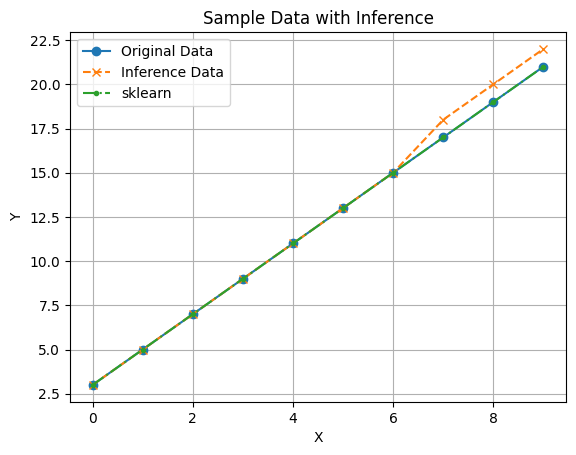

In [24]:
plt.plot(x, y, marker='o', linestyle='-', label='Original Data')  # Original data
plt.plot(x, y_pred, marker='x', linestyle='--', label='Inference Data')  # Inference data
plt.plot(x, y_pred_sk, marker='.', linestyle='-.', label='sklearn')  # Inference data
plt.title('Sample Data with Inference')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.legend()  # Add legend to differentiate between original and inference data
plt.show()